<a href="https://colab.research.google.com/github/ggarciabas/ml_engineer/blob/ds/ds/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio  Machine Learning

## Leitura dos dados

- `monto`: montante (valor)
- `fecha`: data de compra
- `score`: do algoritmo já existente
- `fraude`: indica se foi fraude ou não 

In [1]:
import pandas as pd
# Cria Dataframe inicial
url='https://drive.google.com/file/d/1dRDvoSOtdtsgOG65UVKLTBlzejg_cX4P/view?usp=sharing' 
url2='https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
# https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public
pd_dados = pd.read_csv(url2)

In [2]:
pd_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   a       150000 non-null  int64  
 1   b       137016 non-null  float64
 2   c       137016 non-null  float64
 3   d       149635 non-null  float64
 4   e       150000 non-null  float64
 5   f       149989 non-null  float64
 6   g       149806 non-null  object 
 7   h       150000 non-null  int64  
 8   i       150000 non-null  object 
 9   j       150000 non-null  object 
 10  k       150000 non-null  float64
 11  l       149989 non-null  float64
 12  m       149635 non-null  float64
 13  n       150000 non-null  int64  
 14  o       41143 non-null   object 
 15  p       150000 non-null  object 
 16  fecha   150000 non-null  object 
 17  monto   150000 non-null  float64
 18  score   150000 non-null  int64  
 19  fraude  150000 non-null  int64  
dtypes: float64(9), int64(5), object(6)
memory usage:

In [3]:
pd_dados

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4,0.8191,21393.63,7.0,0.000000,1.0,BR,4,Aparelho Lipocavitação Ultrassônico + Gel Cond...,cat_a5b2091,0.808366,2009.0,434.0,1,NaN,N,2020-04-11 19:31:07,47.15,95,0
149996,4,NaN,NaN,24.0,0.384615,11.0,UY,20,"Sellos De Goma Automaticos, Personalizados.",cat_e39ab7e,0.989981,499.0,135.0,1,NaN,Y,2020-03-11 20:21:35,9.69,0,0
149997,4,NaN,NaN,3.0,0.477778,1.0,BR,19,Hélice 3 Pás Alumínio Rabeta 6.5 Hp Pesca Barc...,cat_ee6ecc8,0.763939,127.0,127.0,1,NaN,Y,2020-03-11 19:36:07,5.97,15,0
149998,4,0.6067,152906.86,1.0,0.099175,133.0,BR,3,Tela Display Lcd Galaxy J7 Neo J701 Com Brilho...,cat_237e2d0,0.382728,4373.0,123.0,1,NaN,Y,2020-03-16 07:13:24,25.83,59,0


## Análise do score atual

In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

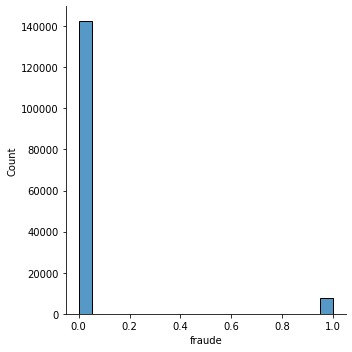

In [5]:
# distribuição dos casos de fraude e não fraude
sns.displot(data=pd_dados, x='fraude', kind='hist')

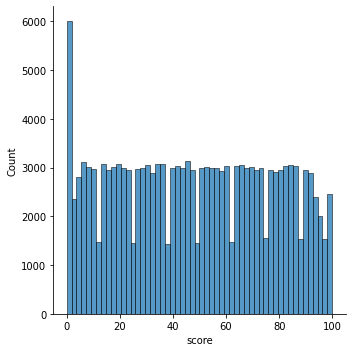

In [6]:
# distribuição dos scores
sns.displot(data=pd_dados, x='score', kind='hist')

In [7]:
# Taxa para lucro
import matplotlib.pyplot as plt
%matplotlib inline 
def valida_taxa (sF, f, m):
  if sF==0 and f==0:
    return m*0.1 # ganha 10%
  elif sF==0 and f==1:
    return -m # perde 100%
  elif sF==1 and f==0:
    return -(m*0.1) # deixou de ganhar 10%
  else: # se for fraude e capturar 
    return 0 
fraude = pd_dados['fraude']
pd_dados['saldoF'] = pd_dados[['fraude', 'monto']].apply(lambda x: x['monto']*0.1 if x['fraude']==0 else 0, axis=1)
cortes = range(0,100)
valor = []
for p in cortes:
  pd_dados['scoreF'] = pd_dados['score'].apply(lambda x: 0 if x<p else 1)
  saldo = pd_dados[['scoreF', 'fraude', 'monto']].apply(lambda x: valida_taxa(x['scoreF'], x['fraude'], x['monto']), axis=1).sum()
  valor.append(saldo)
def plot_corte_valor (A, B, ini, fim):
  plt.figure(figsize=(16,8))
  plt.plot(A[ini:fim], B[ini:fim], 'bx-')
  plt.xlabel('Corte')
  plt.ylabel('Saldo')
  plt.title('Ponto de corte para score e valor de ganho/custo (saldo)')
  plt.show()

In [8]:
print (f"Saldo ótimo: {pd_dados['saldoF'].sum()}")

Saldo ótimo: 598119.9


In [9]:
# Corte de maior valor
cMax = valor.index(max(valor))
print (f"Corte {cMax} para saldo de {max(valor)} (% do ótimo {max(valor)/pd_dados['saldoF'].sum()}")

Corte 86 para saldo de 151522.51200000002 (% do ótimo 0.2533313337342563


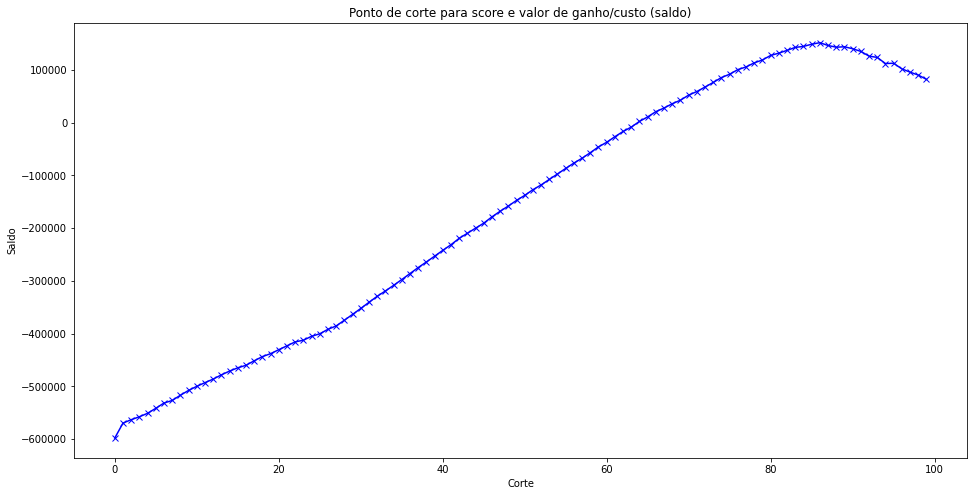

In [10]:
plot_corte_valor(cortes, valor, 0, 100)

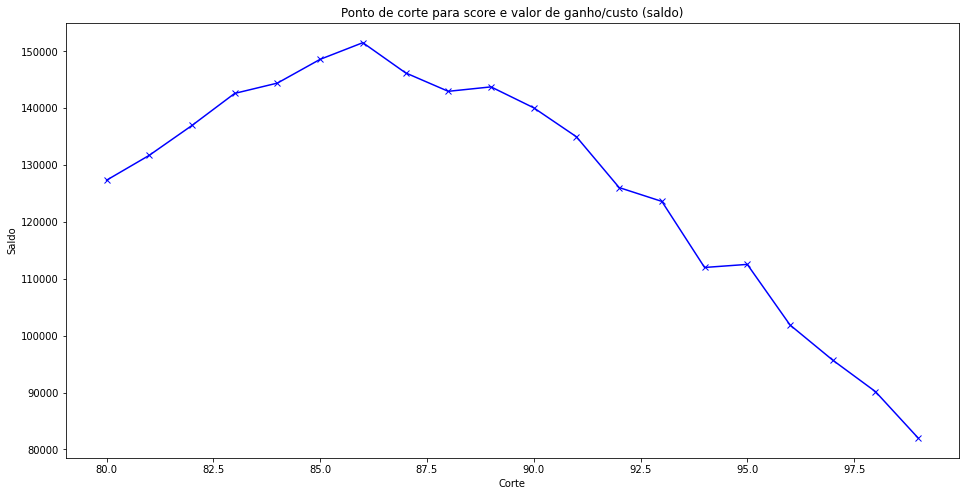

In [11]:
plot_corte_valor(cortes, valor, 80, 100)

In [12]:
# PuLP - vhttps://github.com/ggarciabas/brad_eficiencia/blob/master/pulp_agencia.ipynb

In [13]:
# Relatórios para corte de valor máximo de saldo
cMaxPred = pd_dados['score'].apply(lambda x: 0 if x<cMax else 1)
print (confusion_matrix(cMaxPred, fraude, labels=[1,0]))
print(classification_report(cMaxPred, fraude, labels=[1,0]))

[[  3677  15117]
 [  3823 127383]]
              precision    recall  f1-score   support

           1       0.49      0.20      0.28     18794
           0       0.89      0.97      0.93    131206

    accuracy                           0.87    150000
   macro avg       0.69      0.58      0.61    150000
weighted avg       0.84      0.87      0.85    150000



## Análise dos dados

In [14]:
pd_dados.count()

a         150000
b         137016
c         137016
d         149635
e         150000
f         149989
g         149806
h         150000
i         150000
j         150000
k         150000
l         149989
m         149635
n         150000
o          41143
p         150000
fecha     150000
monto     150000
score     150000
fraude    150000
saldoF    150000
scoreF    150000
dtype: int64

### Total de transações por dia

In [15]:
# Filtra data sem hora
pd_dados['fecha_d'] = pd_dados['fecha'].apply(lambda x: x[:10])

In [16]:
# Período de transações
print(f"{pd_dados['fecha_d'].min()} até {pd_dados['fecha_d'].max()}")

2020-03-08 até 2020-04-21


In [17]:
def plot_fraudes_data (start=None, end=None)->tuple:
  pdf = pd_dados.copy()
  if start != None:
    pdf = pdf[(pdf['fecha_d']>=start)&(pdf['fecha_d']<=end)]
  pdf = pdf[['fecha_d', 'fraude','a']].groupby(['fecha_d', 'fraude']).count().reset_index()
  pdf = pdf.pivot(index="fecha_d", columns=["fraude"], values="a")
  print (f"Fraude {pdf[1].mean()} avg.\tGenuine: {pdf[0].mean()} avg.")
  pdf.plot()
  return pdf[1].sum(),pdf[0].sum()

Fraude 166.66666666666666 avg.	Genuine: 3166.6666666666665 avg.
Fraude: 7500 (0.05)	Genuine: 142500 (0.95)


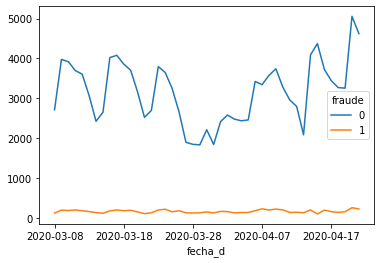

In [18]:
fraude,genuine = plot_fraudes_data()
print (f"Fraude: {fraude} ({fraude/pd_dados.shape[0]})\tGenuine: {genuine} ({genuine/pd_dados.shape[0]})")

## Tratamento das variáveis

- Identificar transações que ocorreram:
  - Durante o dia/Durante a noite
  - Durante a semana/Nos finais de semana

- Transformar coluna `p`` em numérica.

- Identificar risco nas categorias de produto: 
  - contagem de trx por produtos em faixas de dias.
  - média de fraudes em faixas de dias.

In [19]:
import datetime

In [20]:
pd_dados['fecha'] = pd.to_datetime(pd_dados['fecha'])

### Final de semana / dias de semana

In [21]:
pd_dados['weekend'] = pd_dados['fecha'].apply(lambda x: 1 if x.weekday()>=5 else 0)

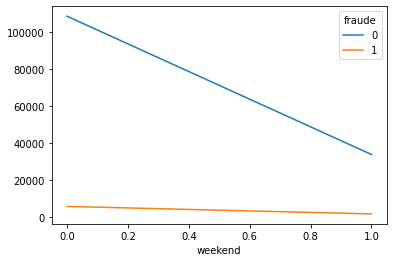

In [22]:
pdWek = pd_dados[['weekend', 'fraude', 'a']].groupby(['weekend','fraude']).count().reset_index().pivot(index="weekend", columns=["fraude"], values="a").plot()

### Dia ou noite

In [23]:
pd_dados['night'] = pd_dados['fecha'].apply(lambda x: 1 if x.hour<=6 else 0)

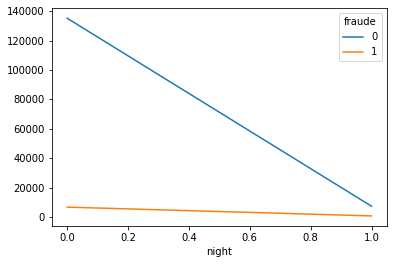

In [24]:
pdWek = pd_dados[['night', 'fraude', 'a']].groupby(['night','fraude']).count().reset_index().pivot(index="night", columns=["fraude"], values="a").plot()

### Risco para categorias

In [25]:
def calc_risk (pdf, delay=7, janelas=[1,7]):
  """
    Calcula o risco de fraude por categorias de produtos
    pdf: dataframe com filtro da categoria a ser avaliada
    delay: prazo de identificação da fraude
    janelas: janelas de análise, como temos poucos dados faremos de 1 em 1 dia e de 7 em 7
  """
  pdf = pdf.sort_values('fecha')
  pdf = pdf.set_index('fecha')
  # quantidade de transações fraudulentas + contagem de transações --> no período de delay 
  fraudes = pdf['fraude'].rolling(f'{delay}d').sum()
  trxS = pdf['fraude'].rolling(f'{delay}d').count()
  for janela in janelas:
    fraudeJ = pdf['fraude'].rolling(f'{delay+janela}d').sum() 
    trxJ = pdf['fraude'].rolling(f'{delay+janela}d').count() 
    riskJ=(fraudeJ-fraudes)/(trxJ-trxS)
    pdf[f'cat_trx_{janela}'] = list((trxJ-trxS))
    pdf[f'cat_risk_{janela}'] = list(riskJ)
  pdf = pdf.reset_index()
  return pdf

In [26]:
pd_dados = pd_dados.groupby('j').apply(lambda x: calc_risk(x)).sort_values('fecha').reset_index(drop=True)

In [27]:
pd_dados[:2]

,fecha,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,monto,score,fraude,saldoF,scoreF,fecha_d,weekend,night,cat_trx_1,cat_risk_1,cat_trx_7,cat_risk_7
0,2020-03-08 00:02:15,4,0.7388,6314.50,14.0,0.139279,24.0,BR,7,Emagrecedor Natural E Eficiente Sem Sacrifícios,cat_381751d,0.937548,2361.0,442.0,1,NaN,Y,22.18,25,0,2.218,0,2020-03-08,1,1,0.0,NaN,0.0,NaN
1,2020-03-08 00:04:25,4,0.7548,21171.09,20.0,0.514815,7.0,BR,2,Lona Plastica Encerado 3x2 Azul Multiuso Imper...,cat_a024847,0.791998,2324.0,73.0,1,NaN,N,6.00,7,0,0.600,0,2020-03-08,1,1,0.0,NaN,0.0,NaN


In [28]:
pd_dados_N = pd_dados.fillna(0)

### V-treat

[Python V-treat](https://github.com/WinVector/pyvtreat)

In [67]:
!pip install vtreat

In [68]:
import vtreat

In [69]:
transform = vtreat.BinomialOutcomeTreatment(outcome_target=True)  

In [70]:
cols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'monto', 'fraude', 'weekend', 'night',
       'cat_trx_1', 'cat_risk_1', 'cat_trx_7', 'cat_risk_7']

In [71]:
d_prepared = transform.fit_transform(pd_dados[cols], pd_dados['fraude'])

In [72]:
d_prepared['fecha_d'] = pd_dados['fecha_d']

In [73]:
transform.score_frame_

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,R2,significance,vcount,default_threshold,recommended
0,cat_risk_1_is_bad,cat_risk_1,missing_indicator,False,True,-0.022220,1.257114e-03,0.000000e+00,10.0,0.020000,True
1,g_is_bad,g,missing_indicator,False,True,0.004511,4.425479e-05,1.044942e-01,10.0,0.020000,False
2,f_is_bad,f,missing_indicator,False,True,-0.001965,1.263239e-08,9.781181e-01,10.0,0.020000,False
3,o_is_bad,o,missing_indicator,False,True,-0.219796,1.054259e-01,0.000000e+00,10.0,0.020000,True
4,c_is_bad,c,missing_indicator,False,True,0.019559,8.964781e-04,2.735590e-13,10.0,0.020000,True
5,l_is_bad,l,missing_indicator,False,True,-0.001965,1.263239e-08,9.781181e-01,10.0,0.020000,False
6,cat_risk_7_is_bad,cat_risk_7,missing_indicator,False,True,-0.016433,6.991204e-04,1.099600e-10,10.0,0.020000,True
7,d_is_bad,d,missing_indicator,False,True,0.006674,9.595605e-05,1.682419e-02,10.0,0.020000,True
8,m_is_bad,m,missing_indicator,False,True,0.006674,9.595605e-05,1.682419e-02,10.0,0.020000,True
9,b_is_bad,b,missing_indicator,False,True,0.019559,8.964781e-04,2.735590e-13,10.0,0.020000,True


In [74]:
transform.score_frame_.loc[transform.score_frame_['recommended'], ['variable']]

,variable
0,cat_risk_1_is_bad
3,o_is_bad
4,c_is_bad
6,cat_risk_7_is_bad
7,d_is_bad
8,m_is_bad
9,b_is_bad
11,night
12,cat_risk_1
13,f


##### Desempenho de variável

In [75]:
!pip install wvpy

In [76]:
import wvpy.util

In [77]:
wvpy.util.plot_roc(prediction=d_prepared['fecha_d_logit_code'], 
                   istrue=d_prepared['fraude'],
                   title = 'performance of fecha_d_logit_code variable')

KeyError: ignored

## Modelagem

Problemas:

- Balanceamento das classes: 5% de fraude (típico 1%)
- Mudança de comportamento ao longo do tempo
- Resposta rápida, NRT, abaixo de 10ms.
- Variáveis categóricas: necessidade de tratamento destas variáveis, `feature aggregation`, `feature embeddings`, etc.
- Problema de sequência de eventos: clientes apresentam comportamentos parecidos ao longo do tempo, assim, existe a necessidade de se identificar casos anormais. Pode-se agregar variáveis ao longo do tempo ou usar modelos sequenciais.
- Sobreposição de classes: variáveis parecidas ou sobrepostas que compreendem classes distintas. Necessidade de um trabalho reforçado na etapa de `feature engineering`.
- Métricas de desempenho: por conta de bases desbalanceadas, métodos convencionais não são suficientes para avaliar fraudes. Necessidade de se considerar os custos envolvidos numa fraude. 

In [104]:
import sklearn
import graphviz
import xgboost

In [78]:
d_prepared.columns

Index(['cat_risk_1_is_bad', 'o_is_bad', 'c_is_bad', 'cat_risk_7_is_bad',
       'd_is_bad', 'm_is_bad', 'b_is_bad', 'night', 'cat_risk_1', 'f',
       'fraude', 'monto', 'cat_trx_1', 'l', 'cat_risk_7', 'a', 'd',
       'cat_trx_7', 'm', 'b', 'n', 'h', 'g_logit_code', 'g_prevalence_code',
       'g_lev_BR', 'g_lev_AR', 'p_logit_code', 'p_prevalence_code', 'p_lev_Y',
       'p_lev_N', 'o_logit_code', 'o_prevalence_code', 'o_lev__NA_', 'o_lev_Y',
       'o_lev_N', 'i_logit_code', 'j_logit_code', 'j_prevalence_code',
       'fecha_d'],
      dtype='object')

In [80]:
features = ['cat_risk_1_is_bad', 'o_is_bad', 'c_is_bad', 'cat_risk_7_is_bad',
            'd_is_bad', 'm_is_bad', 'b_is_bad', 'night', 'cat_risk_1', 'f',
            'monto', 'cat_trx_1', 'l', 'cat_risk_7', 'a', 'd',
            'cat_trx_7', 'm', 'b', 'n', 'h', 'g_logit_code', 'g_prevalence_code',
            'g_lev_BR', 'g_lev_AR', 'p_logit_code', 'p_prevalence_code', 'p_lev_Y',
            'p_lev_N', 'o_logit_code', 'o_prevalence_code', 'o_lev__NA_', 'o_lev_Y',
            'o_lev_N', 'i_logit_code', 'j_logit_code', 'j_prevalence_code']
target = ['fraude']
cols = features+target+['fecha_d']

### Período de `2020-03-08` à `2020-03-29`

- 1 semana para teste
- 1 semana de delay
- 1 semana para treino

[Credit Card Fraud Detection: A Realistic Modeling and a Novel Learning Strategy](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=80380080)

#### Distribuição ao longo do período

> Particular care must be taken in practice when splitting the dataset into training and validation sets, due to the sequential nature of credit card transactions, and the delay in fraud reporting.[3]

(24591, 39)
Fraude 169.85714285714286 avg.	Genuine: 3343.1428571428573 avg.
Fraude: 1189 (0.04835102273189378)	Genuine: 23402 (0.9516489772681063)


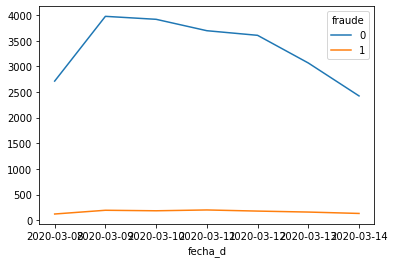

In [94]:
# Treino
dataTrain1 = {'start':'2020-03-08', 'end':'2020-03-14'}
pdfTrain1 = d_prepared[cols].copy()
pdfTrain1 = pdfTrain1[(pdfTrain1['fecha_d']>=dataTrain1['start'])
                      &(pdfTrain1['fecha_d']<=dataTrain1['end'])]
print (pdfTrain1.shape)
fraude,genuine = plot_fraudes_data(dataTrain1['start'], dataTrain1['end'])
print (f"Fraude: {fraude} ({fraude/pdfTrain1.shape[0]})\tGenuine: {genuine} ({genuine/pdfTrain1.shape[0]})")

Fraude 162.42857142857142 avg.	Genuine: 3429.0 avg.


(1137, 24003)

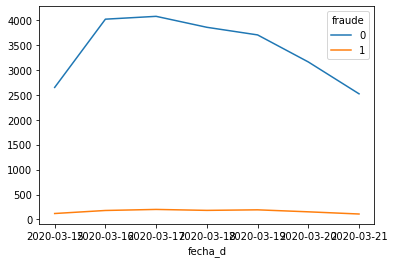

In [95]:
# Delay
dataDelay1 = {'start':'2020-03-15', 'end':'2020-03-21'}
plot_fraudes_data(dataDelay1['start'], dataDelay1['end'])

(20935, 39)
Fraude 163.42857142857142 avg.	Genuine: 2827.285714285714 avg.
Fraude: 1144 (0.054645330785765465)	Genuine: 19791 (0.9453546692142345)


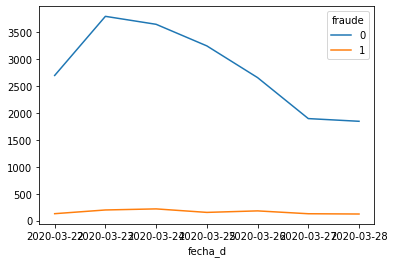

In [96]:
# Teste
dataTest1 = {'start':'2020-03-22', 'end':'2020-03-28'}
pdfTest1 = d_prepared[cols].copy()
pdfTest1 = pdfTest1[(pdfTest1['fecha_d']>=dataTest1['start'])
                      &(pdfTest1['fecha_d']<=dataTest1['end'])]
print (pdfTest1.shape)
fraude,genuine = plot_fraudes_data(dataTest1['start'], dataTest1['end'])
print (f"Fraude: {fraude} ({fraude/pdfTest1.shape[0]})\tGenuine: {genuine} ({genuine/pdfTest1.shape[0]})")

### Testando modelos

In [107]:
modelos = {'Logistic regression': {'modelo':sklearn.linear_model.LogisticRegression(random_state=42)},
            'Decision tree baseline': {'modelo': sklearn.tree.DecisionTreeClassifier(max_depth=2,random_state=42)},
            'Decision tree - auto depth': {'modelo':sklearn.tree.DecisionTreeClassifier(random_state=42)}, 
            #'Random forest': {'modelo':sklearn.ensemble.RandomForestClassifier(random_state=42,n_jobs=-1)},
            'XGBoost': {'modelo':xgboost.XGBClassifier(random_state=42,n_jobs=-1)}
          }

### Decision Tree

Baseline

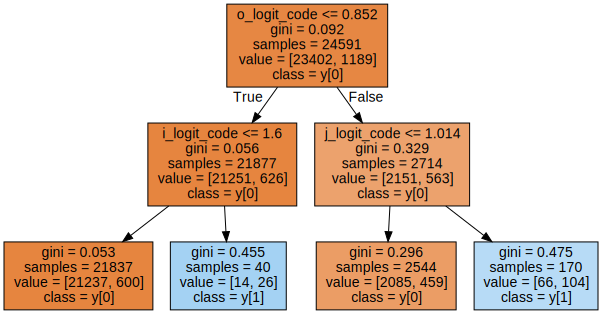

In [101]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 2, random_state=0)
classifier.fit(pdfTrain1[features], pdfTrain1[target])
predictions_train=classifier.predict_proba(pdfTrain1[features])[:,1]
predictions_test=classifier.predict_proba(pdfTest1[features])[:,1]
display(graphviz.Source(sklearn.tree.export_graphviz(classifier,feature_names=features,class_names=True, filled=True)))


#### Feature Engineering

- `feature transformation`, `feature extraction` or `data preprocessing`.

> The zero/one loss function is a standard loss function for binary classification problems. It is however not well suited for credit card fraud detection problems, due to the high-class imbalance (much more genuine than fraudulent transactions). Estimating the performance of a fraud detection system is a non-trivial issue. [3]

### Altera escala dos dados

In [87]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(pdfTrain1[features])
pdfTrain1[features]=scaler.transform(pdfTrain1[features])
pdfTest1[features]=scaler.transform(pdfTest1[features])

## References

1. [Precision Vs. Recall — Evaluating Model Performance in Credit Card Fraud Detection](https://towardsdatascience.com/precision-vs-recall-evaluating-model-performance-in-credit-card-fraud-detection-bb24958b2723)
1. [Rethinking the Right Metrics for Fraud Detection](https://medium.datadriveninvestor.com/rethinking-the-right-metrics-for-fraud-detection-4edfb629c423)
1. [Fraud-Detection-Handbook](https://github.com/Fraud-Detection-Handbook)
  > logistic regression (LR), decision trees (DT), Random forests (RF), Boosting, and Neural networks/Deep learning (NN/DL). LR and DT were chosen due to their simplicity and interpretability. RF and Boosting were chosen since they are currently considered to be state-of-the-art in terms of performance. NN/DL methods were chosen since they provide promising research directions.
  